## Heart Disease Small Project

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heart_disease_df = pd.read_csv("heart_disease_prediction.csv")

In [3]:
heart_disease_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
heart_disease_df.columns.values[0:5]

array(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol'],
      dtype=object)

In [5]:
features_num = len(heart_disease_df.columns.values)
print(f"Number of features: {features_num}")

Number of features: 12


## Descriptive Statistics

In [7]:
ages = heart_disease_df["Age"].values

In [8]:
avarage_age = ages.sum()/len(ages)

In [9]:
avarage_age

53.510893246187365

In [10]:
# Looking missing values

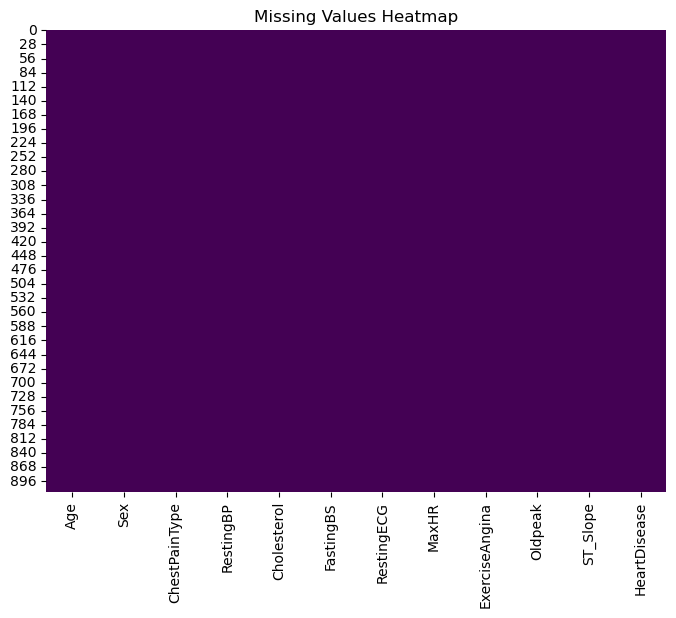

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(heart_disease_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [12]:
# lower and highest values

In [13]:
lowest_val = heart_disease_df["Age"].min()
highest_val = heart_disease_df["Age"].max()

In [14]:
print(f"Lowest Value: {lowest_val} \nHighest Value: {highest_val}")

Lowest Value: 28 
Highest Value: 77


In [15]:
statistics = heart_disease_df.describe()
print(statistics)

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


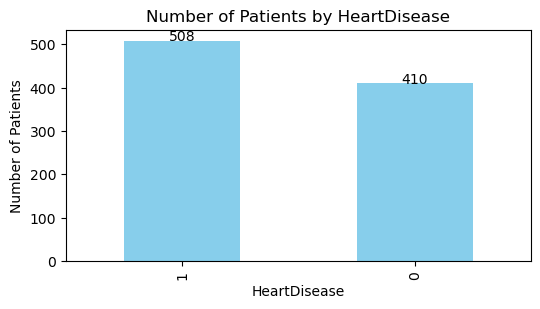

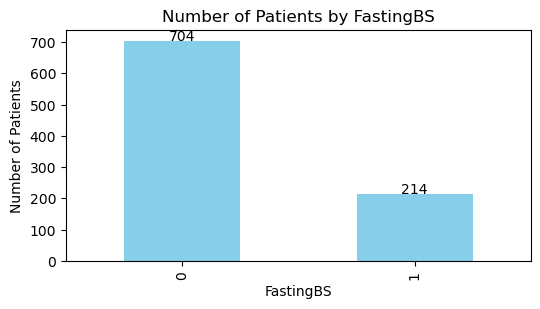

In [16]:
# List of categorical columns including 'HeartDisease' and 'FastingBS'
categorical_columns = ['HeartDisease', 'FastingBS']

# Plot bar charts for each categorical column
for column in categorical_columns:
    # Get the counts of each category
    category_counts = heart_disease_df[column].value_counts()
    
    # Plot the bar chart
    plt.figure(figsize=(6, 3))
    category_counts.plot(kind='bar', color='skyblue')
    
    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Number of Patients')
    plt.title(f'Number of Patients by {column}')
    
    # Add data labels
    for i, count in enumerate(category_counts):
        plt.text(i, count + 0.1, str(count), ha='center')
    
    # Show plot
    plt.show()


<Figure size 1000x1600 with 0 Axes>

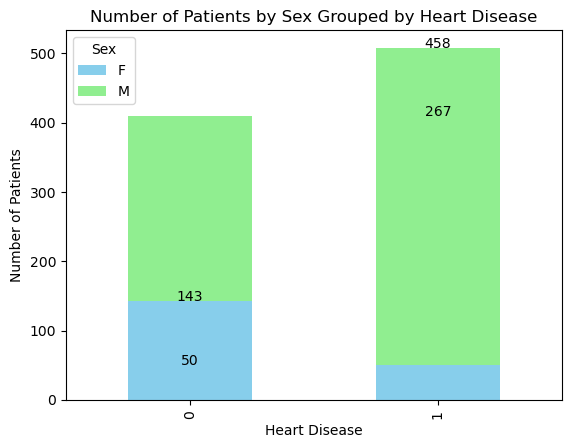

<Figure size 1000x1600 with 0 Axes>

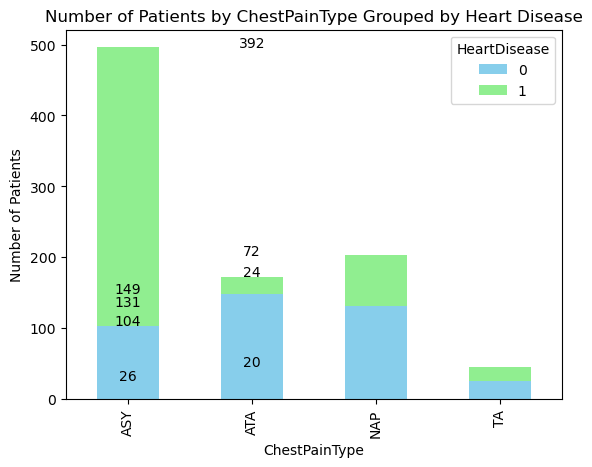

In [17]:
categorical_columns = ['Sex', 'ChestPainType']

for column in categorical_columns:
    # Group the data by 'HeartDisease' and the current categorical column
    if column == 'ChestPainType':
         grouped_data = heart_disease_df.groupby(['ChestPainType', "HeartDisease"]).size().unstack()
            
    else:
         grouped_data = heart_disease_df.groupby(['HeartDisease', column]).size().unstack()        
   
    
    # Plot the bar chart
    plt.figure(figsize=(10, 16))
    grouped_data.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen','red', 'purple'])
    
    # Add labels and title
    if column == 'ChestPainType':
        plt.xlabel('ChestPainType')
        plt.legend(title="HeartDisease")
        
    else:
        plt.xlabel('Heart Disease')
        plt.legend(title=column)
        
        
    plt.ylabel('Number of Patients')
    plt.title(f'Number of Patients by {column} Grouped by Heart Disease')
    
    # Add data labels
    for i, category in enumerate(grouped_data.columns):
        for j, value in enumerate(grouped_data[category]):
            plt.text(i, sum(grouped_data.iloc[j][:i+1]), str(value), ha='center')
    
    # Show plot
    plt.show()

## Data Cleaning

In [18]:
# Filter patients with heart disease
heart_disease_patients = heart_disease_df[heart_disease_df['HeartDisease'] == 1]

# total number of patients with heart disease
total_heart_disease_patients = len(heart_disease_patients)

# number of male patients over 50 years old with heart disease
male_over_50_with_heart_disease = len(heart_disease_patients[(heart_disease_patients['Sex'] == 'M') & (heart_disease_patients['Age'] > 50)])

# percentage of patients with heart disease who are male and over 50 years old
percentage_male_over_50_with_heart_disease = (male_over_50_with_heart_disease / total_heart_disease_patients) * 100

In [19]:
print(f"Total number of patients with heart disease: {total_heart_disease_patients}")
print(f"Number of male patients over 50 years old with heart disease: {male_over_50_with_heart_disease}")
print(f"Percentage of patients with heart disease who are male and over 50 years old: {percentage_male_over_50_with_heart_disease} %")


Total number of patients with heart disease: 508
Number of male patients over 50 years old with heart disease: 344
Percentage of patients with heart disease who are male and over 50 years old: 67.71653543307087 %


In [20]:
# Number of rows with a 0 value for RestingBP
resting_bp_zero_count = len(heart_disease_df[heart_disease_df['RestingBP'] == 0])

# Number of rows with a 0 value for Cholesterol
cholesterol_zero_count = len(heart_disease_df[heart_disease_df['Cholesterol'] == 0])

print("Number of rows with a 0 value for RestingBP:", resting_bp_zero_count)
print("Number of rows with a 0 value for Cholesterol:", cholesterol_zero_count)

Number of rows with a 0 value for RestingBP: 1
Number of rows with a 0 value for Cholesterol: 172


In [21]:
def replace_zeros_with_median(df, column):
    median_value = df[column].median()
    
    # Replacing for median val
    df[column] = df[column].mask(df[column] == 0, median_value)
    
    return df

# Call the function for 'RestingBP' and 'Cholesterol' columns
heart_disease_df = replace_zeros_with_median(heart_disease_df, 'RestingBP')
heart_disease_df = replace_zeros_with_median(heart_disease_df, 'Cholesterol')

In [22]:
# looking again if they were replaced
if resting_bp_zero_count == 0 and cholesterol_zero_count == 0:
    print("All good!")

## Feature Selection

In [23]:
# Dummy variables transformation

In [24]:
heart_disease_df = pd.get_dummies(data = heart_disease_df, drop_first = True)

In [27]:
heart_disease_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160.0,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138.0,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150.0,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144.0,193.0,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130.0,131.0,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130.0,236.0,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [28]:
# finding correlations

Text(0.5, 1.0, "Pearson's Correlation Heatmap")

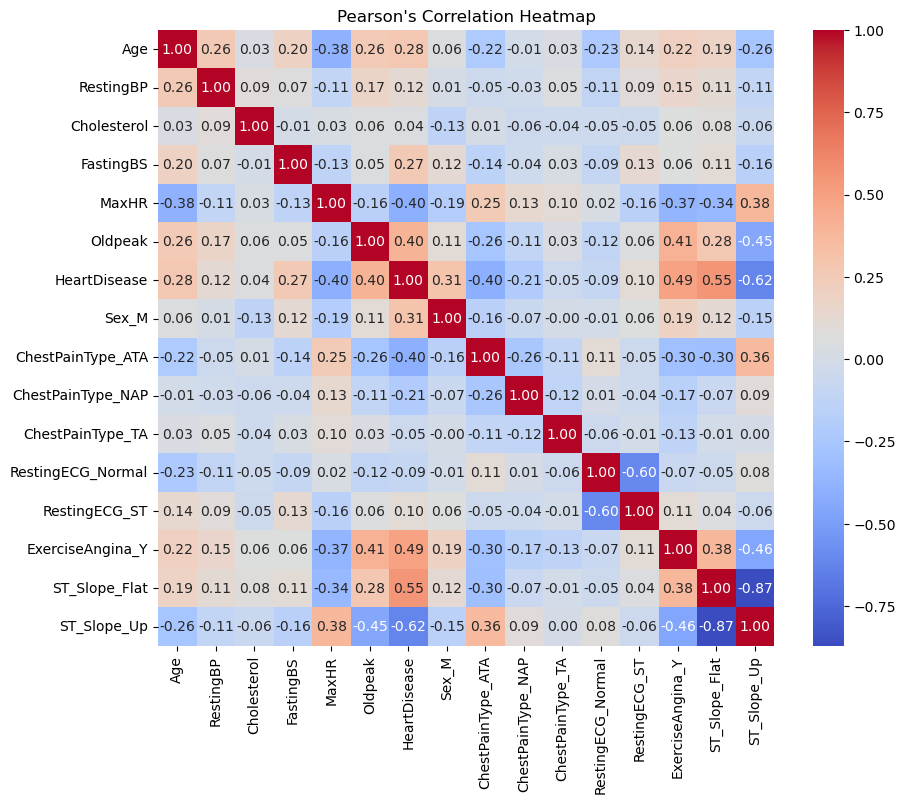

In [29]:
correlation_matrix = heart_disease_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)


plt.title("Pearson's Correlation Heatmap")

## Classifier Constructor with one feature

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [33]:
X = heart_disease_df.drop(columns=['HeartDisease'])
y = heart_disease_df['HeartDisease']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=44)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*X.shape[0]/X_train.shape[0], random_state = 44)

In [35]:
# From the correlation plot
important_features = ["Oldpeak", "Sex_M" , "ExerciseAngina_Y", "ST_Slope_Flat", "ST_Slope_Up"]

In [46]:
top_5_features = correlation_matrix["HeartDisease"].sort_values(ascending=False)[important_features].index

In [48]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [50]:
accuracies = {}
for feature in top_5_features:
    knn = KNeighborsClassifier(n_neighbors = 9)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    accuracies[feature] = round(accuracy, 2) * 100
    
print("Accuracies using KNN")
print(accuracies)

Accuracies using KNN
{'Oldpeak': 68.0, 'Sex_M': 66.0, 'ExerciseAngina_Y': 72.0, 'ST_Slope_Flat': 80.0, 'ST_Slope_Up': 82.0}


## Classifier Constructor with multiple features

In [51]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[top_5_features])
X_val_scaled = scaler.transform(X_val[top_5_features])

The accuracy of the model trained on multiple features is 83.70%


In [91]:
# Create, train, and evaluate the model
k_nn = KNeighborsClassifier(n_neighbors = 9)
k_nn.fit(X_train_scaled, y_train)
accuracy = k_nn.score(X_val_scaled, y_val)
print(f"The accuracy of the model trained on multiple features is {accuracy*100:.2f}%")

The accuracy of the model trained on multiple features is 82.07%


In [ ]:
# with multiple KNN values

In [74]:
accuracies_knn = {}
k_values = [1,5,10,15,20,25,30,35]
for k in k_values:
    k_nn = KNeighborsClassifier(n_neighbors=k)
    k_nn.fit(X_train_scaled, y_train)
    accuracy = k_nn.score(X_val_scaled, y_val)
    
    accuracies_knn[k] = accuracy

In [75]:
accuracies_knn

{1: 0.7228260869565217,
 5: 0.8152173913043478,
 10: 0.8315217391304348,
 15: 0.8315217391304348,
 20: 0.8260869565217391,
 25: 0.8097826086956522,
 30: 0.8097826086956522,
 35: 0.8097826086956522}

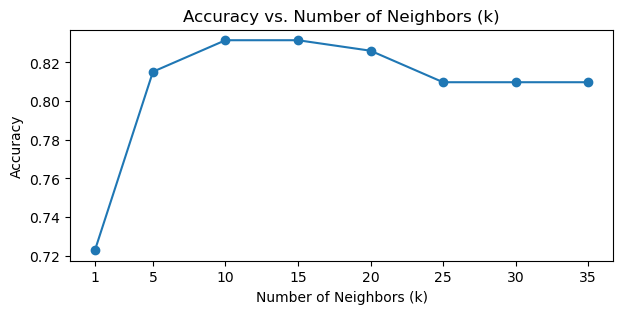

In [85]:
plt.figure(figsize=(7, 3))
plt.plot(list(accuracies_knn.keys()), list(accuracies_knn.values()), marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(False)
plt.xticks(list(accuracies_knn.keys()))
plt.show()

## Hyperparameter Tuning

In [88]:
# GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 222)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[top_5_features])
hyperparams = {
    "n_neighbors": range(1, 25),
    "p": (1, 6),
    "weights": ("uniform", "distance"),
    "metric": ["minkowski", "manhattan"]
}
knn = KNeighborsClassifier()
gridsearch = GridSearchCV(estimator = knn, param_grid = hyperparams, scoring = "accuracy")
gridsearch.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 25), 'p': (1, 6),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [90]:
best_score = gridsearch.best_score_
print(f"Best score obtained using GridSearchCV: {best_score * 100:.2f}%")
best_params = gridsearch.best_params_
print(f"Best The parameter configuration: {best_params}")

Best score obtained using GridSearchCV: 83.79%
Best The parameter configuration: {'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


## Test Set Evaluation

In [92]:
# Normalizing the X_test
X_test_scaled = scaler.transform(X_test[top_5_features])

prediction = gridsearch.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, prediction)
print(f"The accuracy of the model's prediction is {accuracy * 100:.2f}%")

The accuracy of the model's prediction is 86.41%


The accuracy of 86.41% indicates that the model for predicting heart disease based on the given features performs reasonably well. 
With an accuracy of 86.41%, the model correctly predicts the presence or absence of heart disease in the dataset approximately 86.41% of the time. While accuracy is a useful metric, it's essential to consider other performance metrics and domain-specific considerations to comprehensively evaluate the model's effectiveness in clinical settings.